# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah [Bank Customer Attrition Insights](https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights)
 dari Kaggle. Dataset ini berisi informasi demografis, finansial, dan perilaku pelanggan bank. Setiap baris mewakili satu pelanggan, sementara kolom-kolomnya memberikan gambaran mengenai faktor-faktor yang dapat memengaruhi keputusan pelanggan untuk tetap menggunakan atau meninggalkan layanan bank.

 Berikut deskripsi singkat tiap kolom:

| No | Nama Fitur       | Fungsi                                                                 |
|----|------------------|------------------------------------------------------------------------|
| 1  | RowNumber        | Nomor urut data, hanya untuk identifikasi.                            |
| 2  | CustomerId       | ID unik pelanggan, tidak berpengaruh pada churn.                      |
| 3  | Surname          | Nama belakang pelanggan, hanya untuk identifikasi.                    |
| 4  | CreditScore      | Skor kredit; menilai stabilitas finansial dan peluang churn.           |
| 5  | Geography        | Lokasi geografis; memengaruhi pengalaman dan loyalitas.               |
| 6  | Gender           | Jenis kelamin; faktor demografis untuk analisis tambahan.              |
| 7  | Age              | Usia; pelanggan tua lebih loyal, muda lebih mudah churn.               |
| 8  | Tenure           | Lama menjadi nasabah; semakin lama semakin loyal.                      |
| 9  | Balance          | Saldo rekening; saldo besar menunjukkan keterikatan lebih tinggi.      |
| 10 | NumOfProducts    | Jumlah produk yang dimiliki; lebih banyak produk = lebih loyal.        |
| 11 | HasCrCard        | Status kepemilikan kartu kredit; menambah keterikatan dengan bank.     |
| 12 | IsActiveMember   | Status keaktifan; pelanggan aktif cenderung lebih loyal.               |
| 13 | EstimatedSalary  | Estimasi gaji; gaji tinggi lebih stabil dan cenderung loyal.           |
| 14 | Exited           | Label target; 1 = churn, 0 = tidak churn.                             |
| 15 | Complain         | Keluhan pelanggan; keluhan menandakan risiko churn.                    |
| 16 | SatisfactionScore| Tingkat kepuasan layanan; skor tinggi = lebih loyal.                   |
| 17 | CardType         | Jenis kartu (standard, premium, dll.); memengaruhi loyalitas.          |
| 18 | PointsEarned     | Poin loyalitas; makin tinggi poin = makin terikat dengan bank.         |

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import zipfile
import textwrap
import math

# **3. Memuat Dataset**

In [2]:
#!/bin/bash
!curl -L -o bank-customer-attrition-insights.zip\
  "https://www.kaggle.com/api/v1/datasets/download/marusagar/bank-customer-attrition-insights"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  307k  100  307k    0     0   228k      0  0:00:01  0:00:01 --:--:--  992k


In [3]:
with zipfile.ZipFile('/content/bank-customer-attrition-insights.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Distribusi Target

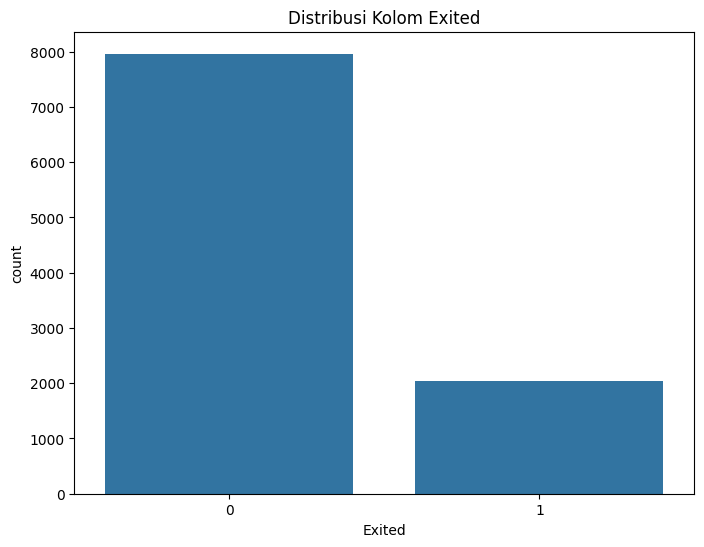

Exited
0    7962
1    2038
Name: count, dtype: int64


In [8]:
# Distribusi kolom Exited
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exited')
plt.title('Distribusi Kolom Exited')
plt.show()

# Tabel untuk menghitung jumlah tiap label
print(df['Exited'].value_counts())

## Mengetahui kolerasi antar fitur

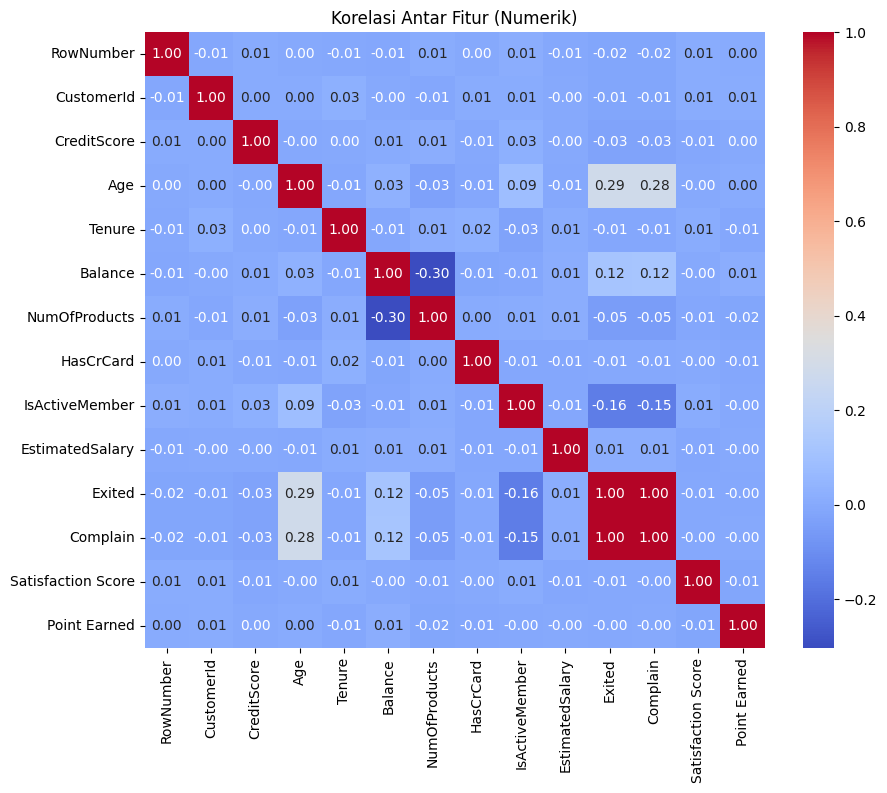

In [9]:
# kolerasi antar fitur numerik
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur (Numerik)')
plt.show()

## Univariate Analysis

### 1. Numerical Features

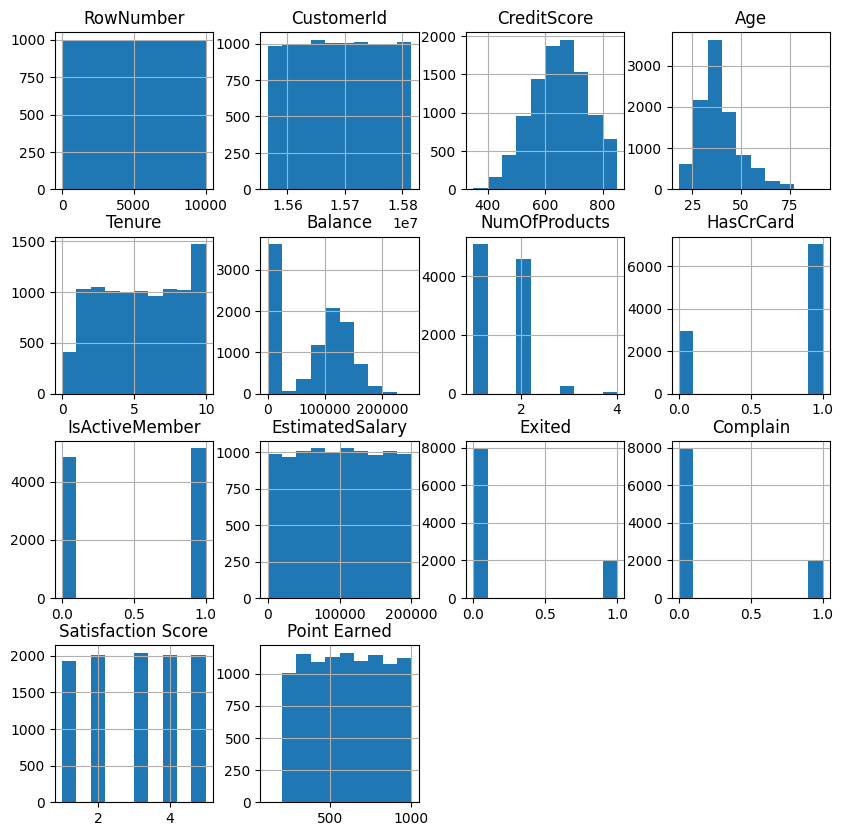

In [10]:
df.hist(figsize=(10, 10))
plt.show()

### Categorical Features

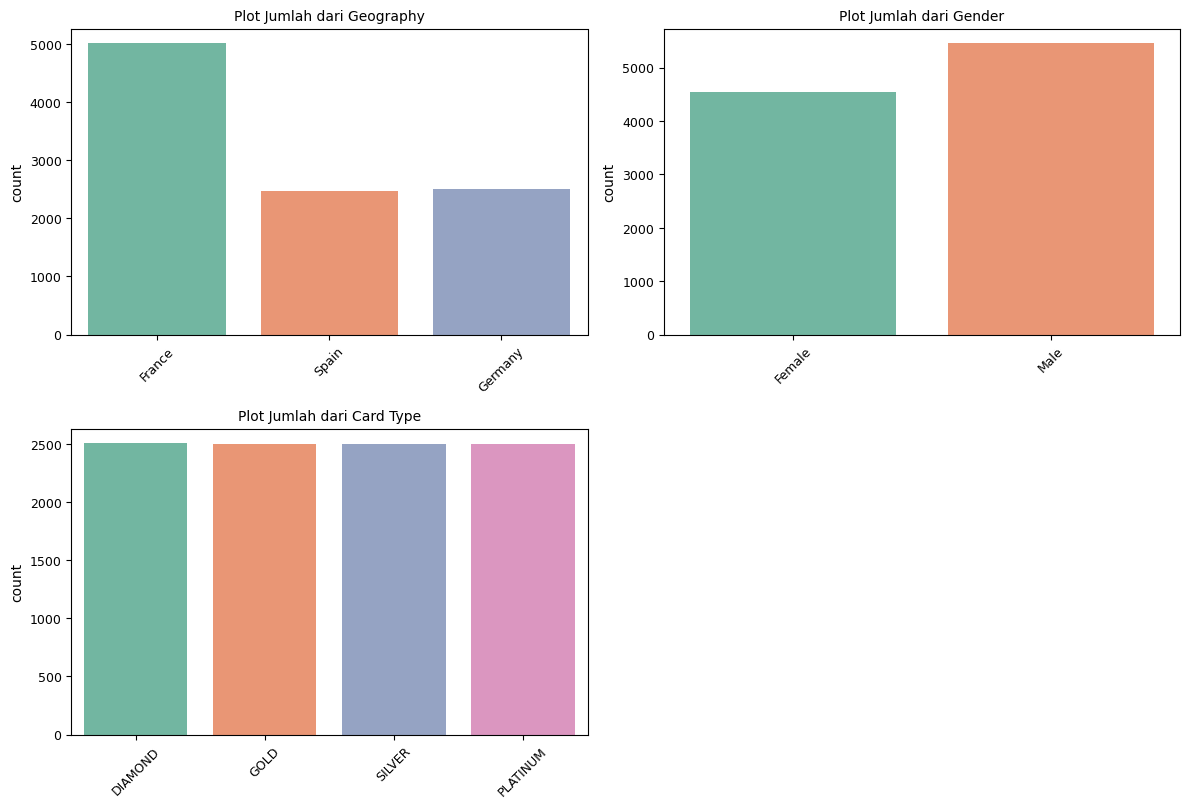

In [11]:
# Ambil kolom kategorikal, kecuali surname
categorical_columns = df.select_dtypes(include=['object']).drop(columns=['Surname'])

# Tentukan ukuran grid subplot (misalnya 2 kolom)
n_cols = 2
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Buat figure & axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # supaya bisa diakses dengan 1D index

# Plot setiap kolom kategorikal
for i, kolom in enumerate(categorical_columns):
    sns.countplot(
        x=kolom,
        hue=kolom,
        data=df,
        ax=axes[i],
        palette='Set2',
        legend=False
    )

    # Judul
    judul = "\n".join(textwrap.wrap(f"Plot Jumlah dari {kolom}", width=30))
    axes[i].set_title(judul, fontsize=10)

    # Styling label
    axes[i].tick_params(axis="x", labelrotation=45, labelsize=9)
    axes[i].tick_params(axis="y", labelsize=9)
    axes[i].set_xlabel("")

# Hapus axis kosong kalau jumlah subplot > jumlah kolom kategorikal
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Multivariate Analysis

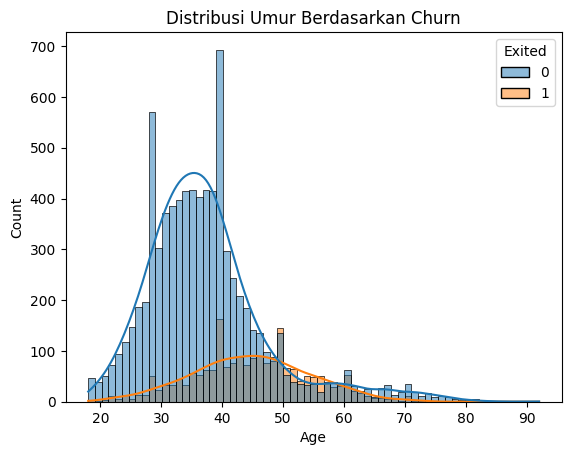

In [12]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True)
plt.title('Distribusi Umur Berdasarkan Churn')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus atau Menangani Data Kosong (Missing Values)

In [13]:
# Mengetahui ada missing value apa ga
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Insight:** Tidak ada data missing value

## Menghapus Data Duplikat

In [14]:
df.duplicated().sum()

np.int64(0)

**Insight:** Tidak ada data duplikat

## Menghapus kolom yang tidak relevan

In [15]:
# Menghapus kolom RowNumber, CustomerId, Surname
clean_df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

## Deteksi dan Penanganan Outlier

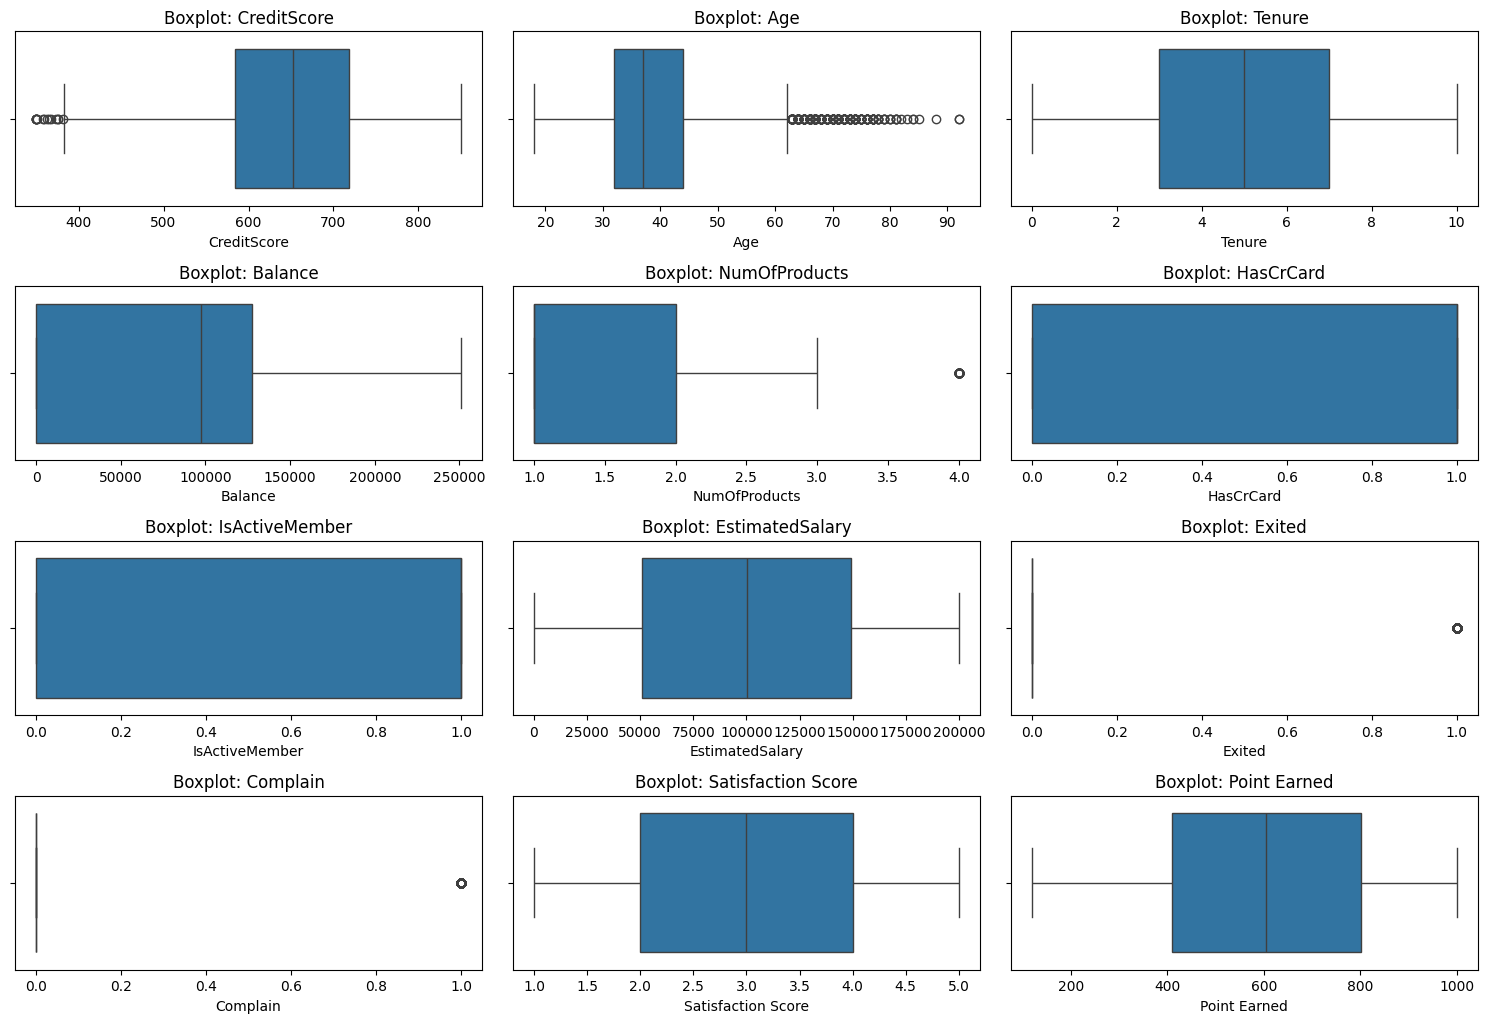

In [16]:
# Deteksi Outlier
numeric_columns = clean_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x=clean_df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

**Insight:**

* Age: terdapat outlier di atas 70 tahun.
* CreditScore: terdapata outlier di skor rendah (< 400)
* NumOfProducts: terdapat outlier di nilai 4 (sedikit sekali jumlahnya)
* Complain dan Exited: karena ini variabel biner, jadi tidak ditangani outliernya. Distribusi yang terlihat “outlier” di boxplot itu wajar.
* Balance, EstimatedSalary, Point Earned: tidak ada outlier ekstrim. Distribusi cukup normal.

In [17]:
# Menangani Outlier hanya pada kolom Age, CreditScore, NumOfProducts
outlier_cols = ['Age', 'CreditScore', 'NumOfProducts']

# Deteksi dan penanganan outlier dengan IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers.")
    return df

# Terapkan fungsi
clean_df = remove_outliers_iqr(clean_df, outlier_cols)

Age: Removed 359 outliers.
CreditScore: Removed 14 outliers.
NumOfProducts: Removed 58 outliers.


## Encoding Data Kategorikal

In [18]:
print(clean_df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [19]:
# Encoding data kategorikal
clean_df = pd.get_dummies(clean_df, columns=['Geography', 'Gender', 'Card Type'])

## Normalisasi atau Standarisasi Fitur

In [20]:
scaler = StandardScaler()
scaler_col = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']
clean_df[scaler_col] = scaler.fit_transform(clean_df[scaler_col])

In [21]:
clean_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.329398,0.485579,2,-1.224491,1,1,1,0.021668,1,1,...,-0.628376,True,False,False,True,False,True,False,False,False
1,-0.443835,0.371711,1,0.118270,1,0,1,0.216264,0,1,...,-0.663797,False,False,True,True,False,True,False,False,False
2,-1.546592,0.485579,8,1.333579,3,1,0,0.240411,1,1,...,-1.013577,True,False,False,True,False,True,False,False,False
3,0.502871,0.143974,1,-1.224491,2,0,0,-0.109102,0,0,...,-1.133123,True,False,False,True,False,False,True,False,False
4,2.073780,0.599447,2,0.786431,1,1,1,-0.365393,0,0,...,-0.801053,False,False,True,True,False,False,True,False,False


## Memisahkan Fitur dan Target

In [22]:
# Memisahkan fitur dan target
X = clean_df.drop('Exited', axis=1)
y = clean_df['Exited']

## SMOTE

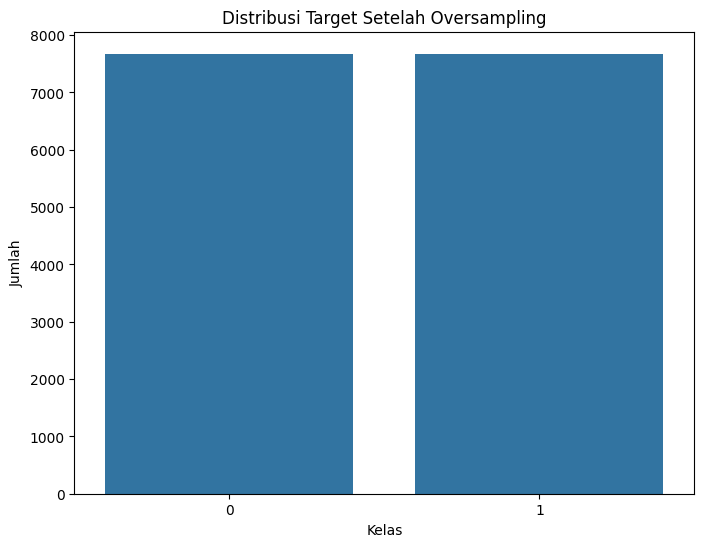

Exited
1    7676
0    7676
Name: count, dtype: int64


In [23]:
# Terapkan SMOTE untuk menangani masalah ketidakseimbangan kelas target
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Periksa distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Distribusi Target Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

print(y_smote.value_counts())

## Split Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)